In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from itertools import combinations, permutations
from time import time
import pandas as pd
from numpy.random import random
from fare.metrics import _count_inversions,_merge_parity
# from orig_agg_util import *
#np.random.seed(890)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# p = 0.5 -> random, fair
# p large -> unfair favors g1
def gen_groups(n, p):
    len1 = int(n/2)
    len0 = n - len1
    groups = []
    while len1 > 0 and len0 >0:
        if random() < p: 
            groups.append(1)
            len1 -= 1
        else:
            groups.append(-1)
            len0 -= 1
    while len1 > 0:
        groups.append(1)
        len1 -= 1
    while len0 >0:
        groups.append(-1)
        len0 -= 1
    return groups
    

In [3]:
def get_ranks_groups_c(rank_len, n_ranks, groups,p,theta):
    r = []
    ranks = np.genfromtxt("data/R_n"+str(rank_len)+"_N"+str(n_ranks)+"_t"+str(theta)+".txt", delimiter=',')
    for rank in ranks:
        g = [groups[int(x-1)]*x for x in rank]
        # for colors
        # r.append(g*rank)
        r.append(g)
    return r

In [4]:
def get_ranks_groups_h(rank_len, n_ranks, groups,p,theta):
    r = []
    ranks = np.genfromtxt("data/R_n"+str(rank_len)+"_N"+str(n_ranks)+"_t"+str(theta)+".txt", delimiter=',')
    for rank in ranks:
        g = [groups[int(x-1)] for x in rank]
        # for colors
        # r.append(g*rank)
        r.append(g)
    return r

In [5]:

def plot_thetas_h(n_ranks,rank_len,ps,ylabels,filename,ts=False,hidex=False):
    thetas = [0.01, 0.1, 0.3, 0.9]
    hs = np.repeat(10, len(thetas))
    hs = np.insert(hs,0, 1)
    ws = np.repeat(10, len(ps))
    fig, axs = plt.subplots(len(thetas)+1, len(ps), sharex=True, 
                            gridspec_kw={'height_ratios':hs, 'width_ratios':ws, 'wspace':0.15})
    for j,p in enumerate(ps):
        groups = gen_groups(rank_len, p)
        g = [] 
        g.append(groups)
        axs[0][j].imshow(g, cmap='hot', interpolation='nearest')
        axs[0][j].set_yticks([])
        axs[0][j].set_xticks([0,10,20,30,40,49])
        axs[0][j].set_xticklabels([0,10,20,30,40,50])
        axs[0][j].set_title(ylabels[j], fontsize=20)
    #     axs[0].set_title(" ", fontsize=18)
    #     axs[0].set_xlabel(" ", fontsize=14)
    
        for i,theta in enumerate(thetas):
            r = get_ranks_groups_h(rank_len, n_ranks, groups, p, theta)
            axs[i+1][j].imshow(r, cmap='hot', interpolation='nearest')
            if hidex:
                axs[i+1][j].set_yticks([])
                axs[i+1][j].set_yticklabels([],fontsize=0)
            if ts and j==0:
                axs[i+1][j].set_ylabel(r'$\theta = $'+str(theta), fontsize=20)#, rotation=0)
            if i == len(thetas)-1:
                plt.setp(axs[len(thetas)][j].get_xticklabels(), fontsize=18)
    plt.savefig(filename, bbox_inches='tight')
    plt.show()

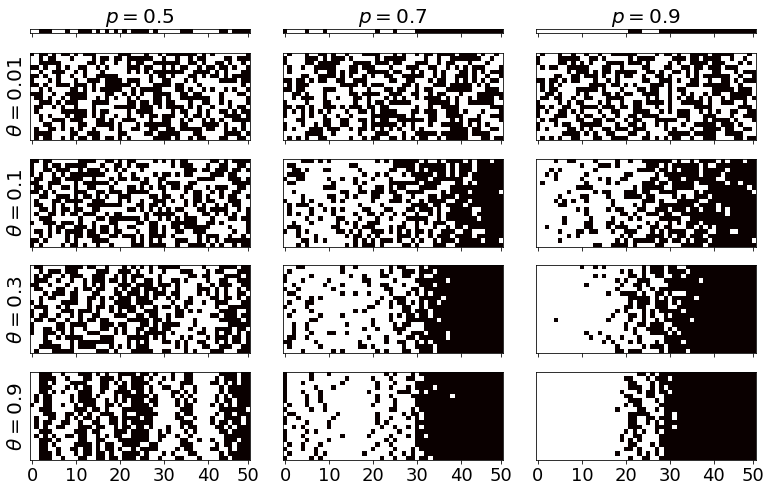

In [6]:
plt.rcParams['figure.figsize'] = 13,8
np.random.seed(seed=867)

n_ranks = 20
rank_len = 50

plot_thetas_h(n_ranks,rank_len,[0.5,0.7,0.9], [r'$p = 0.5$',r'$p = 0.7$',r'$p = 0.9$'],"bias_mallows_small_h.pdf", ts=True, hidex=True)

In [7]:
def plot_thetas_c(n_ranks,rank_len,p,ylabel,filename,ts=False,hidex=False):
    thetas = [0.001, 0.1, 0.25, 1.0]
    ws = np.repeat(10, len(thetas))
    ws = np.insert(ws,0,1)
    fig, axs = plt.subplots(1, len(thetas)+1, sharey=True, 
                            gridspec_kw={'width_ratios':ws})
    groups = gen_groups(rank_len, p)
    g = [] 
    groups_c = [x*i for i,x in enumerate(groups)]
    g.append(groups_c)
    axs[0].imshow(np.transpose(g), cmap='PiYG', interpolation='nearest')
    axs[0].set_xticks([])
    axs[0].set_yticks([0,10,20,30,39])
    axs[0].set_yticklabels([0,10,20,30,40],fontsize=14)
    axs[0].set_ylabel(ylabel, fontsize=18)
#     axs[0].set_title(" ", fontsize=18)
#     axs[0].set_xlabel(" ", fontsize=14)
    for i,theta in enumerate(thetas):
        r = get_ranks_groups_c(rank_len, n_ranks, groups, p, theta)

        axs[i+1].imshow(np.transpose(r), cmap='PiYG', interpolation='nearest')
        if hidex:
            axs[i+1].set_xticks([])
        else:
            axs[i+1].set_xticks([0,10,19])
            axs[i+1].set_xticklabels([0,10,20],fontsize=14)
        if ts:
            axs[i+1].set_title(r'$\theta = $'+str(theta), fontsize=18)
    plt.savefig(filename, bbox_inches='tight')
    plt.show()

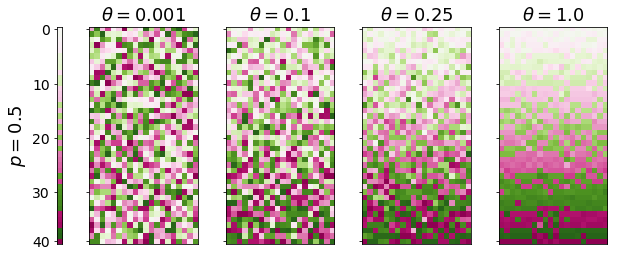

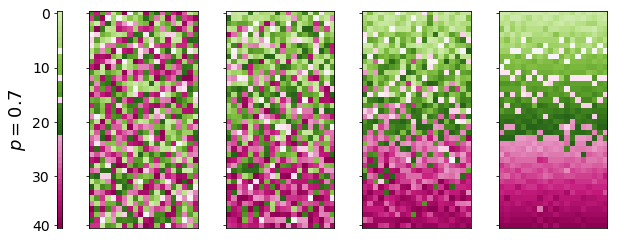

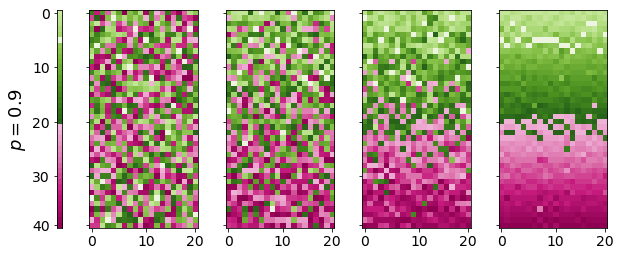

In [9]:
plt.rcParams['figure.figsize'] = 10,4
np.random.seed(seed=867)

n_ranks = 20
rank_len = 40

plot_thetas_c(n_ranks,rank_len,0.5,r'$p = 0.5$',"bias_mallows_small5.pdf", ts=True, hidex=True)
plot_thetas_c(n_ranks,rank_len,0.7,r'$p = 0.7$', "bias_mallows_small7.pdf",ts=False, hidex=True)
plot_thetas_c(n_ranks,rank_len,0.9,r'$p = 0.9$',"bias_mallows_small9.pdf",ts=False)